In [18]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
products = pd.read_csv('ConsumerElectronics.csv', encoding='ISO-8859-1',dtype={'order_id':'Int64', 'order_item_id':'Int64',
                                                                         'cust_id':'str','pincode':'str','gmv':'str'},parse_dates =['order_date'])

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
products.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [26]:
products['gmv']=pd.to_numeric(products.gmv,errors='coerce')
products[products.gmv.isna()].fsn_id.count()

4904

In [27]:
products['cust_id']=pd.to_numeric(products.cust_id,errors='coerce')
products[products.cust_id.isna()].fsn_id.count()

4904

In [28]:
products['pincode']=pd.to_numeric(products.pincode,errors='coerce')
products[products.pincode.isna()].fsn_id.count()

4904

In [29]:
products['deliverybdays']=pd.to_numeric(products.deliverybdays,errors='coerce')
products[products.deliverybdays.isna()].fsn_id.count()

1312972

In [30]:
products['deliverycdays']=pd.to_numeric(products.deliverycdays,errors='coerce')
products[products.deliverycdays.isna()].fsn_id.count()

1312971

In [31]:
products.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400.0,1,NaN,NaN,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900.0,1,NaN,NaN,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990.0,1,NaN,NaN,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618.0,1,NaN,NaN,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [32]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null datetime64[ns]
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null int64
order_item_id                      1648824 non-null int64
gmv                                1643920 non-null float64
units                              1648824 non-null int64
deliverybdays                      335852 non-null float64
deliverycdays                      335853 non-null float64
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1648824 non-null obje

In [34]:
## Drop all null values in gmv
products.dropna(subset=['gmv'],inplace=True)
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643920 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1643920 non-null object
order_date                         1643920 non-null datetime64[ns]
Year                               1643920 non-null int64
Month                              1643920 non-null int64
order_id                           1643920 non-null int64
order_item_id                      1643920 non-null int64
gmv                                1643920 non-null float64
units                              1643920 non-null int64
deliverybdays                      335850 non-null float64
deliverycdays                      335851 non-null float64
s1_fact.order_payment_type         1643920 non-null object
sla                                1643920 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1643920 non-null obje

In [36]:
1312972/1643920

0.798683634240109

In [38]:
products.drop(axis=1,columns=['deliverybdays','deliverycdays'],inplace=True)

In [39]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643920 entries, 0 to 1648823
Data columns (total 18 columns):
fsn_id                             1643920 non-null object
order_date                         1643920 non-null datetime64[ns]
Year                               1643920 non-null int64
Month                              1643920 non-null int64
order_id                           1643920 non-null int64
order_item_id                      1643920 non-null int64
gmv                                1643920 non-null float64
units                              1643920 non-null int64
s1_fact.order_payment_type         1643920 non-null object
sla                                1643920 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1643920 non-null object
product_analytic_category          1643920 non-null object
product_analytic_sub_category      1643920 non-null obje

In [40]:
products.fsn_id.value_counts()

ACCE6VGHYKYFX4WB    37406
SELDXMC3JNMTQMGV    17801
CAMDA6RJERF8HS4G    16706
ACCDXEGXG8HJUCSK    14221
ACCECYHH4QDNZXEX    13617
ACCE9C3WYBMPJ98R    13232
CAMDUGSSHXQ9FDHM    12480
ACCEBEMGQUZYJBKG    12238
ACCEBASUU3ZZRDYV    12192
ACCEBEMEWFSDJH72    11732
SELE863FGS4HMQWF    10774
ACCDVZ83VBHCWFFA    10350
ACCEE3JNKNFH5KBG     9034
CAMDF4FHEHKYNSHY     8884
ACCDH7MFZJGRWJCW     7963
ACCE9R3UDGBBE4ZY     7725
CAME6FWA7RHNXGPF     7399
ACCDQGZS3EK5WVR5     6817
ACCE53FQZTN9UNPG     6542
AUDDGN3Q2GSCBUSX     6522
ACCDVUZFPGSGGYRD     6491
ACCE9R3U6DZENXFM     6409
SELEH8VYQRNA99BH     6256
ACCE58P94S5YVBYG     6240
ACCEDHZHERAJFMNT     6061
VGLEF3X3KGCZZT3N     6040
ACCEAJP64HZ8GZGR     5485
ACCE6VGHRPDQR5GD     5100
ACCE9R3UCZZGFVVQ     4966
ACCDFZEJ6ZGSWRMK     4882
                    ...  
GAMEDPJB7FBCY6HF        1
ACCEHH35YKPAKH2V        1
ACCECYEPQ3QYJNNH        1
ACCE9R3SKNFQGMUD        1
ACCECGTF4RFJXJXJ        1
ACCDS4Z2PTVMHZHQ        1
ACCDNGRFKHV4FX69        1
ACCEH4BDTUHQ

In [48]:
products.Year.value_counts(dropna=False)

2016    855006
2015    788914
Name: Year, dtype: int64

In [47]:
products.Month.value_counts(dropna=False)

9     207472
10    205730
12    158151
5     157072
3     153299
2     144084
1     143768
4     134390
11    129448
6     121798
7      88439
8        269
Name: Month, dtype: int64

In [46]:
products['s1_fact.order_payment_type'].value_counts(dropna=False)

COD        1191443
Prepaid     452477
Name: s1_fact.order_payment_type, dtype: int64

In [45]:
products.pincode.value_counts(dropna=False)

-9.031043e+18    13506
-9.779010e+17    12055
 7.346497e+18     7243
 8.649648e+18     7188
 6.404913e+18     6398
 9.226248e+17     6377
 6.513331e+18     6288
 2.175163e+18     6146
-4.769171e+18     6139
 2.222912e+18     6031
-3.444751e+18     5377
 7.686938e+18     5312
-4.317473e+18     4606
-7.885152e+18     4435
 4.337281e+18     4317
 8.424231e+18     4263
-9.141541e+18     3929
 6.820321e+18     3862
 4.705607e+18     3837
 6.148223e+18     3785
 3.654846e+16     3753
-2.498956e+18     3722
 6.195476e+18     3438
-7.008123e+18     3417
 6.280637e+18     3352
 2.662204e+18     3318
-2.112132e+18     3290
-5.922363e+18     3240
 1.151368e+18     3214
-7.204916e+17     3065
                 ...  
-5.869364e+18        1
 3.353643e+18        1
 6.024585e+18        1
-8.127330e+18        1
-6.010972e+18        1
-6.351221e+18        1
-5.022779e+18        1
 8.380523e+18        1
 1.252046e+18        1
 4.759496e+18        1
-6.526234e+18        1
-3.989416e+16        1
-1.071054e+

In [49]:
products.product_analytic_super_category.value_counts(dropna=False)

CE    1643920
Name: product_analytic_super_category, dtype: int64

In [50]:
products.product_analytic_vertical.value_counts(dropna=False)

LaptopSpeaker              286665
MobileSpeaker              249643
AudioMP3Player             112545
PhysicalGame               104799
HomeAudioSpeaker            85306
GamingHeadset               62180
GamePad                     58944
DSLR                        56514
Flash                       48717
SelectorBox                 46122
CameraBattery               41187
RemoteControl               39583
Point & Shoot               38618
CameraTripod                37770
GamingMouse                 37356
VideoGlasses                36644
Lens                        35367
FMRadio                     28147
VideoPlayer                 20222
HandheldGamingConsole       19344
CameraStorageMemoryCard     17943
CameraBag                   17465
CameraBatteryCharger        15614
Binoculars                  14554
Filter                      12684
GamingConsole                9667
GamingAccessoryKit           9474
CodeInTheBoxGame             9331
Microphone                   9049
TVOutCableAcce

In [51]:
products.product_analytic_sub_category.value_counts(dropna=False)

Speaker                542122
CameraAccessory        238862
GamingAccessory        201318
TVVideoSmall           142571
HomeAudio              124415
Game                   114130
AudioMP3Player         112545
Camera                 100942
GamingConsole           29011
CameraStorage           17943
AudioAccessory          11676
HomeTheatre              4245
AmplifierReceiver        4043
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [52]:
products.product_mrp.value_counts(dropna=False)

999       108339
1999       79533
499        41141
310        40774
599        40200
4999       37549
2999       36491
3999       34691
500        31292
1000       30420
1299       29335
1990       27359
1499       27223
799        24815
699        24651
800        23852
3499       23357
399        20089
2499       18863
2990       18537
1599       18374
34950      16711
1199       15813
7999       15476
950        15411
3199       14875
1100       14836
899        14516
400        13973
2000       13595
           ...  
3439           1
6517           1
113995         1
2430           1
8580           1
63900          1
9600           1
21890          1
4491           1
14743          1
63885          1
8599           1
1430           1
4504           1
2505           1
34190          1
9632           1
51647          1
20899          1
7598           1
434            1
2489           1
17840          1
2488           1
6586           1
4543           1
5564           1
15800         

In [53]:
products.product_procurement_sla.value_counts(dropna=False)

 2       527125
 1       307539
 3       302481
 5       221322
 4       119840
-1        75611
 0        42357
 6        18501
 7        11719
 15        6159
 14        5256
 1000      4735
 13         523
 8          522
 9           97
 10          73
 12          60
Name: product_procurement_sla, dtype: int64

In [54]:
products.sla.value_counts(dropna=False)

6       236755
5       233013
4       217226
7       201521
3       177330
8       154897
2       109819
9        97793
1        74083
10       57535
11       33833
12       19554
13       11135
0         5974
14        5938
15        3181
16        1822
17         891
18         511
19         289
20         158
21         106
25          76
22          72
24          69
23          59
26          58
27          44
28          36
30          31
29          20
31          12
32          10
35           7
38           7
33           6
42           5
39           5
34           4
44           3
41           3
40           3
61           3
36           3
37           2
239          2
45           2
47           2
184          1
175          1
145          1
68           1
1004         1
60           1
56           1
52           1
51           1
46           1
43           1
1006         1
Name: sla, dtype: int64

In [56]:
products['day']=products.order_date.dt.day

In [57]:
products.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,day
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400.0,1,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,17
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900.0,1,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,19
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,20
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,14
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,17


In [61]:
### Filter the  camera accessory, home audio and gaming accessory sub-categories
products_filtered=pd.DataFrame(products[products.product_analytic_sub_category.isin(['CameraAccessory','GamingAccessory','HomeAudio'])])

In [62]:
products_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564595 entries, 0 to 1647205
Data columns (total 19 columns):
fsn_id                             564595 non-null object
order_date                         564595 non-null datetime64[ns]
Year                               564595 non-null int64
Month                              564595 non-null int64
order_id                           564595 non-null int64
order_item_id                      564595 non-null int64
gmv                                564595 non-null float64
units                              564595 non-null int64
s1_fact.order_payment_type         564595 non-null object
sla                                564595 non-null int64
cust_id                            564595 non-null float64
pincode                            564595 non-null float64
product_analytic_super_category    564595 non-null object
product_analytic_category          564595 non-null object
product_analytic_sub_category      564595 non-null object
product_analy

In [63]:
## Assign week numbers
products_filtered['Week_Number'] = products_filtered.order_date.dt.week

In [64]:
products_filtered.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,day,Week_Number
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400.0,1,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,17,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900.0,1,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,19,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,20,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,14,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,17,42


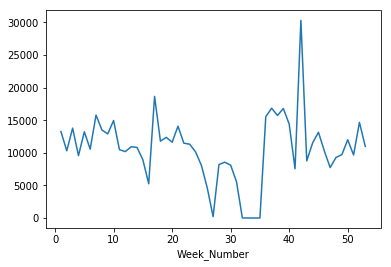

In [77]:
prd_grp=products_filtered.groupby('Week_Number')
prd_grp.count().order_id.plot()

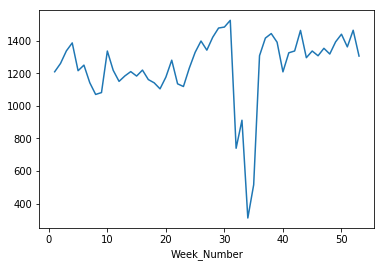

In [79]:
prd_grp=products_filtered.groupby('Week_Number')
prd_grp.mean().gmv.plot()

In [11]:
from pandas import ExcelWriter
from pandas import ExcelFile

media_invest = pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment')

print("Column headings:")
print(media_invest.columns)

Column headings:
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Investment in various media heads, INR Cr.', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')
Column headings:
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Investment in various media heads, INR Cr.', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


In [12]:
media_invest.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,"Investment in various media heads, INR Cr.",Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
1,NaN,2015,7,17.0618,0.21533,2.53301,7.41427,0.000932898,1.32728,0.547254,5.0237,NaN,NaN
2,NaN,2015,8,5.06431,0.00643807,1.27807,1.06333,6.32513e-06,0.129244,0.073684,2.51353,NaN,NaN
3,NaN,2015,9,96.2544,3.8795,1.35653,62.7877,0.610292,16.38,5.03827,6.20215,NaN,NaN
4,NaN,2015,10,170.156,6.14471,12.6225,84.6725,3.44407,24.3718,6.97371,31.927,NaN,NaN


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,"Investment in various media heads, INR Cr.",Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
1,NaN,2015,7,17.0618,0.21533,2.53301,7.41427,0.000932898,1.32728,0.547254,5.0237,NaN,NaN
2,NaN,2015,8,5.06431,0.00643807,1.27807,1.06333,6.32513e-06,0.129244,0.073684,2.51353,NaN,NaN
3,NaN,2015,9,96.2544,3.8795,1.35653,62.7877,0.610292,16.38,5.03827,6.20215,NaN,NaN
4,NaN,2015,10,170.156,6.14471,12.6225,84.6725,3.44407,24.3718,6.97371,31.927,NaN,NaN


In [13]:
nps_score = pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score')
print(nps_score.columns)
nps_score.head()

Index(['Unnamed: 0', 'July'15', 'Aug'15', 'Sept'15', 'Oct'15', 'Nov'15',
       'Dec'15', 'Jan'16', 'Feb'16', 'Mar'16', 'Apr'16', 'May'16', 'June'16'],
      dtype='object')
Index(['Unnamed: 0', 'July'15', 'Aug'15', 'Sept'15', 'Oct'15', 'Nov'15',
       'Dec'15', 'Jan'16', 'Feb'16', 'Mar'16', 'Apr'16', 'May'16', 'June'16'],
      dtype='object')


,Unnamed: 0,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687
1,Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000


,Unnamed: 0,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687
1,Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000


In [14]:
spl_sales = pd.read_excel('Media data and other information.xlsx', sheet_name='Special Sale Calendar')
print(spl_sales.columns)
spl_sales.head()

Index(['Unnamed: 0', 'Unnamed: 1', 'Sales Calendar'], dtype='object')
Index(['Unnamed: 0', 'Unnamed: 1', 'Sales Calendar'], dtype='object')


,Unnamed: 0,Unnamed: 1,Sales Calendar
0,NaN,2015.0,(18-19th July)
1,NaN,NaN,(15-17th Aug)
2,NaN,NaN,(28-30th Aug)
3,NaN,NaN,(17-15th Oct)
4,NaN,NaN,(7-14th Nov)


,Unnamed: 0,Unnamed: 1,Sales Calendar
0,NaN,2015.0,(18-19th July)
1,NaN,NaN,(15-17th Aug)
2,NaN,NaN,(28-30th Aug)
3,NaN,NaN,(17-15th Oct)
4,NaN,NaN,(7-14th Nov)
